In [1]:
'''
Imports
'''
import pandas as pd

In [2]:
'''
Paths
'''
ROOT_DATA_PATH = 'D:\\HAM_10000\Data\\HAM10000_images_all'
METADATA_PATH = 'D:\\HAM_10000\\Data\\HAM10000_metadata.csv'
MODEL_SAVE_PATH = 'D:\\HAM_10000\\HAM_10000_Classification\\Binary_Classification\\ResNet34_HAM10000_1-1.pth'
LOG_FILE = 'D:\\HAM_10000\\HAM_10000_Classification\\Binary_Classification\\log.csv'

In [3]:
df = pd.read_csv(METADATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [4]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [5]:
df['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

'bkl', 'df', 'nv', 'vasc': benign

'akiec', 'bcc', 'mel': malignant

In [6]:
dx_binary_mapping = {
    'bkl': 0,
    'nv': 0,
    'df': 0,
    'vasc': 0,
    'akiec': 1,
    'bcc': 1,
    'mel': 1
}

In [7]:
dx_bin = df['dx'].map(dx_binary_mapping)
dx_bin

0        0
1        0
2        0
3        0
4        0
        ..
10010    1
10011    1
10012    1
10013    1
10014    1
Name: dx, Length: 10015, dtype: int64

In [8]:
df_binary_dict = {
    'image_id': df['image_id'],
    'dx_binary': dx_bin
}
df_binary = pd.DataFrame(df_binary_dict)

In [9]:
sum(list(df_binary.set_index('image_id')['dx_binary'].to_dict().values()))

1954

In [10]:
df_binary

,image_id,dx_binary
0,ISIC_0027419,0
1,ISIC_0025030,0
2,ISIC_0026769,0
3,ISIC_0025661,0
4,ISIC_0031633,0
...,...,...
10010,ISIC_0033084,1
10011,ISIC_0033550,1
10012,ISIC_0033536,1
10013,ISIC_0032854,1


In [11]:
df_binary[1:10]

,image_id,dx_binary
1,ISIC_0025030,0
2,ISIC_0026769,0
3,ISIC_0025661,0
4,ISIC_0031633,0
5,ISIC_0027850,0
6,ISIC_0029176,0
7,ISIC_0029068,0
8,ISIC_0025837,0
9,ISIC_0025209,0


In [12]:
df_binary.to_csv('D:\\HAM_10000\\HAM10000_metadata_binary.csv', index=False)

In [13]:
import dataset_dataloader

METADATA_PATH_SELECTION = 'D:\\HAM_10000\\Data\\HAM10000_metadata_binary.csv'

In [14]:
train_dl, val_dl, test_dl, df_train, train_trans, df_test, test_trans = dataset_dataloader.get_loaders(root_data_path=ROOT_DATA_PATH, metadata_path=METADATA_PATH_SELECTION)

In [15]:
len(train_dl)

86

In [16]:
train_ds = dataset_dataloader.HAM10000_BINARY(root_dir=ROOT_DATA_PATH, metadata_df=df_train, transform=train_trans)
test_ds = dataset_dataloader.HAM10000_BINARY(root_dir=ROOT_DATA_PATH, metadata_df=df_test, transform=test_trans)

In [17]:
len(train_ds), len(test_ds)

(2734, 394)

In [18]:
train_ds[0][0].shape

torch.Size([3, 224, 224])

In [19]:
test_ds[0][0]

tensor([[[2.1331, 2.1031, 2.1445,  ..., 2.1393, 2.1335, 2.1205],
         [2.1258, 2.1285, 2.1190,  ..., 2.1428, 2.1418, 2.1254],
         [2.1203, 2.1416, 2.1101,  ..., 2.1567, 2.1472, 2.1117],
         ...,
         [2.0132, 2.0042, 2.0002,  ..., 2.1105, 2.0955, 2.1015],
         [1.9652, 1.9456, 1.9375,  ..., 2.1286, 2.1121, 2.0572],
         [1.9923, 1.9314, 1.9441,  ..., 2.1308, 2.0741, 2.0504]],

        [[1.3155, 1.2679, 1.2627,  ..., 1.2642, 1.2467, 1.2524],
         [1.2608, 1.2506, 1.2730,  ..., 1.2522, 1.2649, 1.2638],
         [1.2346, 1.2429, 1.2277,  ..., 1.2620, 1.2816, 1.2302],
         ...,
         [0.9880, 0.9879, 0.9930,  ..., 1.1684, 1.1932, 1.2089],
         [1.0058, 0.9630, 0.9812,  ..., 1.1902, 1.2125, 1.0885],
         [0.9872, 0.9363, 0.9403,  ..., 1.2434, 1.1817, 1.1270]],

        [[1.6244, 1.6066, 1.6187,  ..., 1.5596, 1.5646, 1.5662],
         [1.5999, 1.5936, 1.6027,  ..., 1.5457, 1.5457, 1.5735],
         [1.5844, 1.5811, 1.5522,  ..., 1.5744, 1.5848, 1.

In [20]:
import matplotlib.pyplot as plt
import torch
import numpy as np
def visualize_train_images(images, titles=None):
    '''
    
    '''
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        if isinstance(image, torch.Tensor):
            print(image.shape)
            image = image.permute(1, 2, 0).numpy()  # Change from CxHxW to HxWxC and convert to numpy
        plt.imshow(image)
        if titles:
            plt.title(f"label: {titles[i]}")
        plt.axis('off')
    plt.show()
    '''
    indices = np.random.choice(len(train_dataset_album), size=3, replace=False)
    images, label, image_ids  = zip(*[train_dataset_album[i] for i in indices])
    visualize_train_images(images, titles=[image_ids, label])
    '''

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


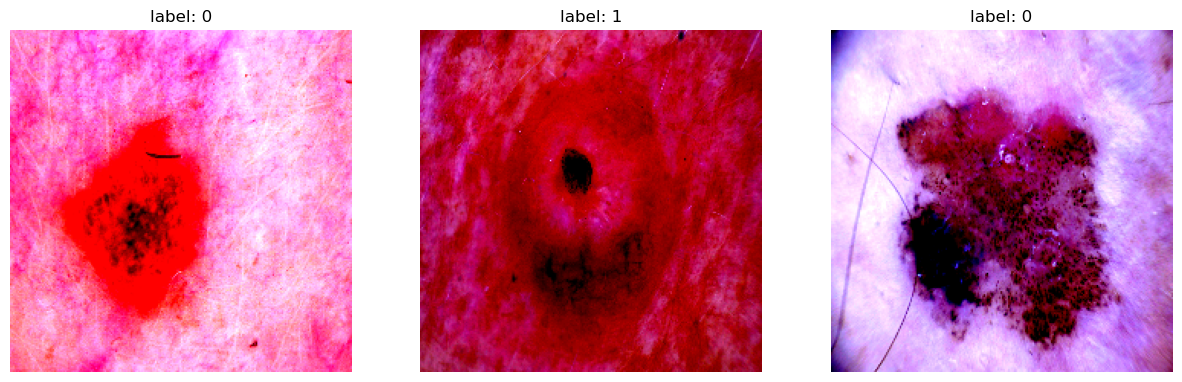

In [21]:
indices = np.random.choice(len(test_ds), size=3, replace=False)
images, label  = zip(*[test_ds[i] for i in indices])
visualize_train_images(images, titles=label)

In [22]:
import os
os.listdir(ROOT_DATA_PATH)

['ISIC_0024306.jpg',
 'ISIC_0024307.jpg',
 'ISIC_0024308.jpg',
 'ISIC_0024309.jpg',
 'ISIC_0024310.jpg',
 'ISIC_0024311.jpg',
 'ISIC_0024312.jpg',
 'ISIC_0024313.jpg',
 'ISIC_0024314.jpg',
 'ISIC_0024315.jpg',
 'ISIC_0024316.jpg',
 'ISIC_0024317.jpg',
 'ISIC_0024318.jpg',
 'ISIC_0024319.jpg',
 'ISIC_0024320.jpg',
 'ISIC_0024321.jpg',
 'ISIC_0024322.jpg',
 'ISIC_0024323.jpg',
 'ISIC_0024324.jpg',
 'ISIC_0024325.jpg',
 'ISIC_0024326.jpg',
 'ISIC_0024327.jpg',
 'ISIC_0024328.jpg',
 'ISIC_0024329.jpg',
 'ISIC_0024330.jpg',
 'ISIC_0024331.jpg',
 'ISIC_0024332.jpg',
 'ISIC_0024333.jpg',
 'ISIC_0024334.jpg',
 'ISIC_0024335.jpg',
 'ISIC_0024336.jpg',
 'ISIC_0024337.jpg',
 'ISIC_0024338.jpg',
 'ISIC_0024339.jpg',
 'ISIC_0024340.jpg',
 'ISIC_0024341.jpg',
 'ISIC_0024342.jpg',
 'ISIC_0024343.jpg',
 'ISIC_0024344.jpg',
 'ISIC_0024345.jpg',
 'ISIC_0024346.jpg',
 'ISIC_0024347.jpg',
 'ISIC_0024348.jpg',
 'ISIC_0024349.jpg',
 'ISIC_0024350.jpg',
 'ISIC_0024351.jpg',
 'ISIC_0024352.jpg',
 'ISIC_002435

In [26]:
def vis_image(image):
    plt.figure(figsize=(15, 5))
    if isinstance(image, torch.Tensor):
        print(image.shape)
        image = image.permute(1, 2, 0).numpy()  # Change from CxHxW to HxWxC and convert to numpy
    plt.imshow(image)
    plt.axis('off')
    plt.show()

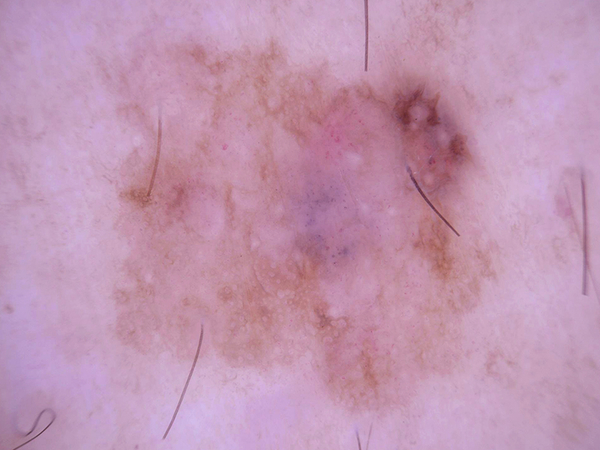

In [27]:
from PIL import Image
img = Image.open(os.path.join(ROOT_DATA_PATH, os.listdir(ROOT_DATA_PATH)[6]))
img

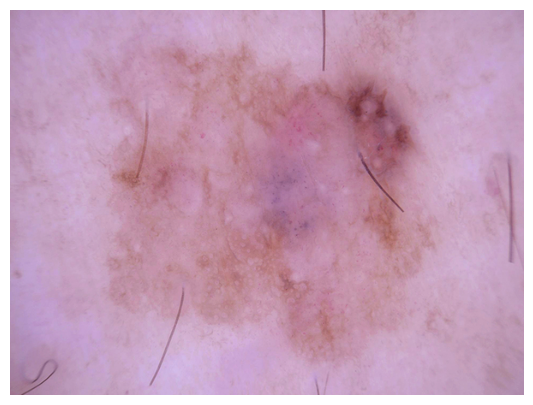

In [28]:
vis_image(img)

torch.Size([3, 224, 224])


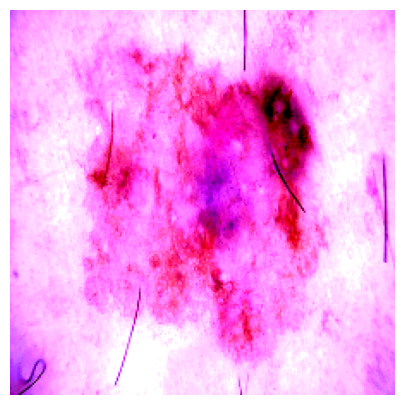

In [152]:
img1 = test_trans(image = np.array(img))['image']
vis_image(img1)

In [155]:
torch.max(img1), torch.min(img1)

(tensor(2.2566), tensor(-1.2479))

In [171]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
trans_1 = A.Compose([
    A.Resize(224, 224),
    # A.Normalize(
    #     mean=[0.485, 0.456, 0.406], 
    #     std=[0.229, 0.224, 0.225], 
    #     max_pixel_value=255.0, 
    #     p=1.0
    # ),
    ToTensorV2()], p=1.)

torch.Size([3, 224, 224])


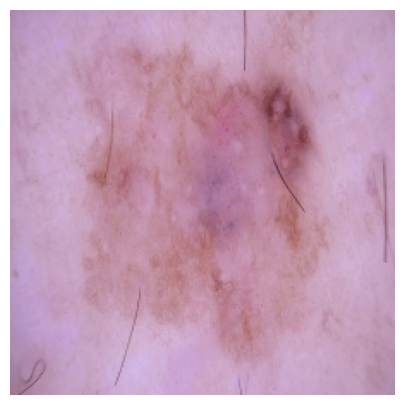

In [172]:
img2 = trans_1(image = np.array(img))['image']
vis_image(img2)